In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


df_listing = pd.read_csv("../../raw_data/sfo/listings-1.csv")
df_transit = pd.read_csv("data/sfo_distance.csv")

#### Check imported data

In [2]:
df_listing.head()

id                        listing_url       scrape_id last_scraped  \
0   958   https://www.airbnb.com/rooms/958  20200815122856   2020-08-15   
1  5858  https://www.airbnb.com/rooms/5858  20200815122856   2020-08-15   
2  7918  https://www.airbnb.com/rooms/7918  20200815122856   2020-08-15   
3  8142  https://www.airbnb.com/rooms/8142  20200815122856   2020-08-15   
4  8339  https://www.airbnb.com/rooms/8339  20200815122856   2020-08-15   

                                                name  \
0              Bright, Modern Garden Unit - 1BR/1BTH   
1                                 Creative Sanctuary   
2         A Friendly Room - UCSF/USF - San Francisco   
3  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4                    Historic Alamo Square Victorian   

                                         description  \
0  Cleaning Protocol: Our cleaners follow the Air...   
1  <b>The space</b><br />We live in a large Victo...   
2  Nice and good public transportation.  7 minute...   
3  Nice and good public transportation.  7 minute...   
4  Pls email before booking. <br />Interior featu...   

                               neighborhood_overview  \
0  Quiet cul de sac in friendly neighborhood<br /...   
1  I love how our neighborhood feels quiet but is...   
2  Shopping old town, restaurants, McDonald, Whol...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7c2a199-4c17...     1169   
1  https://a0.muscache.com/pictures/17714/3a7aea1...     8904   
2  https://a0.muscache.com/pictures/26356/8030652...    21994   
3  https://a0.muscache.com/pictures/27832/3b1f9e5...    21994   
4  https://a0.muscache.com/pictures/213fbf05-3545...    24215   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/1169  ...                        10.0   
1   https://www.airbnb.com/users/show/8904  ...                        10.0   
2  https://www.airbnb.com/users/show/21994  ...                         9.0   
3  https://www.airbnb.com/users/show/21994  ...                        10.0   
4  https://www.airbnb.com/users/show/24215  ...                        10.0   

  review_scores_location review_scores_value      license instant_bookable  \
0                   10.0                10.0  STR-0001256                f   
1                   10.0                 9.0          NaN                f   
2                    9.0                 8.0          NaN                f   
3                    9.0                 9.0          NaN                f   
4                   10.0                10.0  STR-0000264                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              9                                           0   
3                              9                                           0   
4                              2                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            9   
3                                            9   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.91  
1                                           0              0.81  
2                                           0              0.14  
3                                           0              0.11  
4                                           0              0.21  

[5 rows x 74 columns]

#### Merge Dataset and fix data type

In [3]:
df = pd.merge(df_transit, df_listing, on="id")
df["price"] = df.price.str.replace('$','')
df["price"].replace(',','', regex=True, inplace=True)
df["price"] = df["price"].astype(float)

df_filtered = df[["distance", "duration", "price", "accommodates", "neighbourhood_cleansed", "property_type"]]
df_filtered.head()

distance  duration  price  accommodates neighbourhood_cleansed  \
0        14         3  132.0             3       Western Addition   
1       366        91  235.0             5         Bernal Heights   
2        45         8   56.0             2         Haight Ashbury   
3        45         8   56.0             2         Haight Ashbury   
4       102        27  750.0             4       Western Addition   

               property_type  
0           Entire apartment  
1           Entire apartment  
2  Private room in apartment  
3  Private room in apartment  
4         Entire condominium

#### Create a base visualization

In [51]:

plotdata = df_filtered[(df["property_type"] == "Entire apartment")&(df["distance"] < 2000)&(df["price"]<150)]

# plotdata
sns.relplot(data=plotdata, x="price", y="distance")

KeyError: False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6840 non-null   int64  
 1   distance                                      6840 non-null   int64  
 2   duration                                      6840 non-null   int64  
 3   listing_url                                   6840 non-null   object 
 4   scrape_id                                     6840 non-null   int64  
 5   last_scraped                                  6840 non-null   object 
 6   name                                          6840 non-null   object 
 7   description                                   6797 non-null   object 
 8   neighborhood_overview                         5057 non-null   object 
 9   picture_url                                   6840 non-null   o

#### Split Data

In [43]:
from sklearn.model_selection import train_test_split

Y = plotdata["price"].values.reshape(-1, 1)
X = plotdata["distance"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)

#### LinearRegression

In [44]:
regr = LinearRegression()  # create object for the class
regr.fit(X_train, y_train) # perform linear regression
Y_pred = regr.predict(X_test)  # make predictions

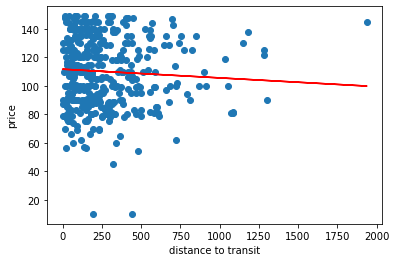

In [46]:
plt.scatter(X_test,y_test)
plt.plot(X_test, Y_pred, color='red')
plt.xlabel('distance to transit')
plt.ylabel('price')
plt.show()

#### Regression Values

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# The coefficients
print('Coefficients:', regr.coef_[0][0])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: -0.0061218367615460505
Mean squared error: 600.75
Coefficient of determination: -0.01


#### LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.metrics import accuracy_score

lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(plotdata["price"])
X = lab_enc.fit_transform(plotdata["distance"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)



# Train model
clf_lg = LogisticRegression()  
clf_lg.fit(X_train, y_train)

lg_predictions = clf_lg.predict(X_test)
lg_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lg_predictions})
lg_results_df.sample(10)

/Users/Ansley/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Actual  Predicted
248      26         71
148      89         71
107      64         71
241      63         71
7        82         71
88       78         71
227      83         78
397      24         71
179      44         71
281      63         78

In [42]:
# Accuracy
lg_accuracy = accuracy_score(y_test,lg_predictions)
print("Accuracy:", lg_accuracy)

Accuracy: 0.043795620437956206
